# IMDB movies reviews classification
In this notebook I will follow example from Deep Learning for Python book. I will use Tensorflow 2.0

## Data Loading
First of all load data from keras. We got dataset splitted in two sets:
    - Train dataset
    - Test dataset
num_words=10000 restrict the loaded dato to top 10.000 most frequent words, so the max index in the dataset will not exceed 10.000.

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print(f'MAX Index: {max([max(sequence) for sequence in train_data])}')

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\ala_j\.conda\envs\deep_learning\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


MAX Index: 9999


C:\Users\ala_j\.conda\envs\deep_learning\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


To decode on of the loaded review from numbers to English word index is needed.

In [2]:
word_index = imdb.get_word_index()
reversed_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reversed_word_index.get(i - 3, '?') for i in train_data[0]])
print(f'Review: {train_data[0]}')
print(f'Review decoding: {decoded_review}')

Review: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Review decoding: ? this film was just brilliant cast

## Preparing the data
A Neuronal Network need tensor as a input, so we need to transform each review to tensor. For this porpuse we use the One-Hot encoding for train and test data. One-Hot tensors will have shape of (10.000,0)
Train and test labels are encoding as float.

In [3]:
import numpy as np
def vectorize_sequences(sequence, dimension=10000):
    results = np.zeros((len(sequence), dimension))
    for i, sequence in enumerate(sequence):
        results[i, sequence] = 1.
        
    return results
    
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Bulding the Neuronal Network
The architecture selected for the networks consists of two hidden layers with 6 hiddens units per layer. 
Relu is selected for activation fuction of the hidden layers, for output layer Sigmoid function is selected as activation function.

In [4]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Compiling the model
For the compiling step it is necessary to select a loss function and a optimizer.
Due to we are facing a binary classification problem _binary_crossentropy_ is selected as loss function. The crossentropy is a good choice when the network output class probabilities
The selected optimizer is  _rmsprop_, it use the magnitude of recent gradients to normalize the gradients. It keep a moving average over the root mean squared gradients, by which we divide the current gradient.

In [5]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

The optimizer can be configured, importing it from keras.optimizers. We can change the value of the learning rate, that can be explained speed at which the network learns.
Also, we can change the metrics to binary precision to better suit the problem.

In [6]:
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=[metrics.binary_accuracy])

### Training the model
When the model is compiled it's time to train it. Before, training data is splitted into train and validation data. For the validation data 10.000 samples will be selected.

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Now the model is trained for 20 epochs, in mini batches of 512 examples. The validation data is passed through argument.

In [8]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.6127 - binary_accuracy: 0.6786 - val_loss: 0.4046 - val_binary_accuracy: 0.8696
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3445 - binary_accuracy: 0.9010 - val_loss: 0.3173 - val_binary_accuracy: 0.8871
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2455 - binary_accuracy: 0.9270 - val_loss: 0.2909 - val_binary_accuracy: 0.8867
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1856 - binary_accuracy: 0.9463 - val_loss: 0.2861 - val_binary_accuracy: 0.8857
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1488 - binary_accuracy: 0.9578 - val_loss: 0.2791 - val_binary_accuracy: 0.8887
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1231 - binary_accuracy: 0.9661 - val_loss: 0.2981 - val_binary_accuracy: 0.8817
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - los

When the fitting proccess is finished we have dictionary with data about everything that happend during training.
### Plotting the data
With this dictionary we can plot the metrics that were monitored. Let´s see a plot with training accuracy and loss.

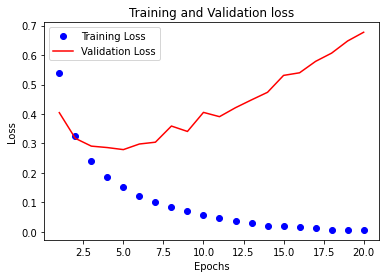

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

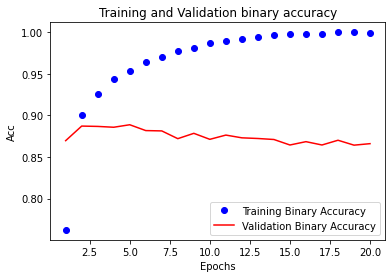

In [15]:
plt.clf()

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training Binary Accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation Binary Accuracy')
plt.title('Training and Validation binary accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

The plots show how the network perform better in the training, that is the **overfitting**. The model isn't generalize well the data. In this case using only 3 epochs is enought to prevent overfitting.

In [26]:
history = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
30/30 [==============================] - 0s 15ms/step - loss: 1.5820e-06 - binary_accuracy: 1.0000
Epoch 2/4
30/30 [==============================] - 0s 11ms/step - loss: 9.7271e-07 - binary_accuracy: 1.0000
Epoch 3/4
30/30 [==============================] - 0s 11ms/step - loss: 8.0770e-07 - binary_accuracy: 1.0000
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 1.9143 - binary_accuracy: 0.8418


[1.9142792224884033, 0.8417999744415283]

The results obtained are not good as state of the art solutions. A good practice to improve the model is to choose different values for the params and test the different model to select which have better performance
#### Making predictions
Keras have a function to make predictions for new data.

In [30]:
model.predict(x_test)

array([[1.9059112e-08],
       [1.0000000e+00],
       [9.9999988e-01],
       ...,
       [3.3434284e-07],
       [2.7888012e-07],
       [7.6351821e-01]], dtype=float32)